<span style="font-size: 30px; font-weight: bold;">Import Libraries</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

<span style="font-size: 30px; font-weight: bold;">Read Dataset</span>

In [2]:
df=pd.read_csv("BRCA.csv")

<span style="font-size: 30px; font-weight: bold;">Initial Data Inspection</span>

In [3]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [5]:
df.duplicated().sum()

np.int64(6)

In [6]:
df.drop_duplicates(keep="first", inplace=True)

In [7]:
df.isnull().sum()

Patient_ID             1
Age                    1
Gender                 1
Protein1               1
Protein2               1
Protein3               1
Protein4               1
Tumour_Stage           1
Histology              1
ER status              1
PR status              1
HER2 status            1
Surgery_type           1
Date_of_Surgery        1
Date_of_Last_Visit    18
Patient_Status        14
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,317.0,58.725552,12.827374,29.00000,49.00000,58.000000,67.00000,90.0000
Protein1,317.0,-0.027232,0.543858,-2.14460,-0.35060,0.005649,0.33626,1.5936
Protein2,317.0,0.949557,0.906153,-0.97873,0.36884,0.997130,1.61200,3.4022
Protein3,317.0,-0.095104,0.589027,-1.62740,-0.53136,-0.193040,0.25121,2.1934
Protein4,317.0,0.006713,0.625965,-2.02550,-0.38224,0.038522,0.43625,1.6299


In [10]:
df.describe(include=object)

,Patient_ID,Gender,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
count,317,317,317,317,317,317,317,317,317,317,317
unique,317,2,3,3,1,1,2,4,178,285,2
top,TCGA-B6-A40B,FEMALE,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-Dec-18,15-Jan-20,Alive
freq,1,313,180,224,317,317,288,97,5,3,255


<span style="font-size: 30px; font-weight: bold;">Data Visualization</span>

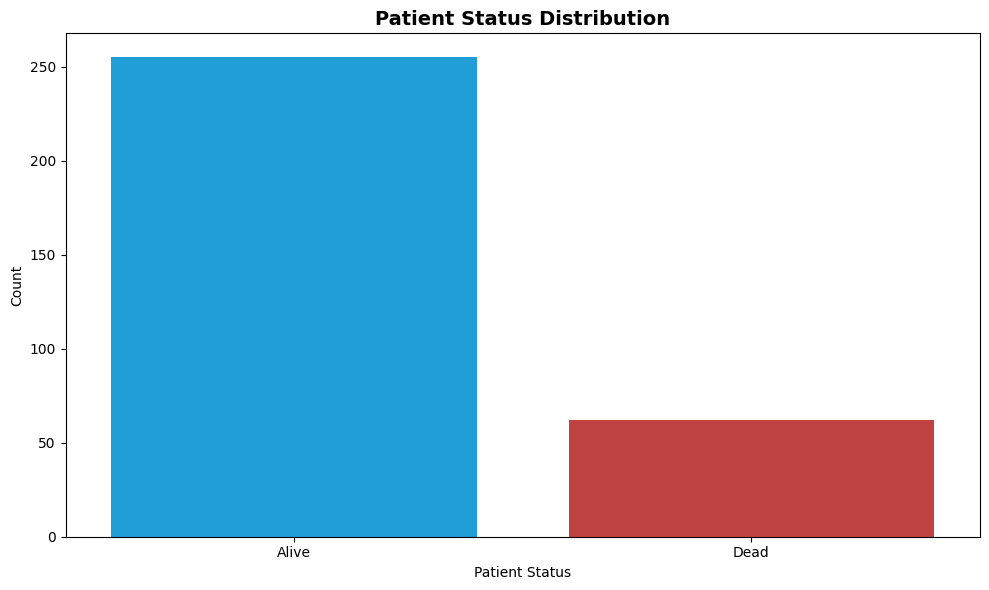

In [11]:
#Patient Status Distribution
plt.figure(figsize=(10, 6))

sns.countplot(
    x='Patient_Status', 
    data=df, 
    palette={'Alive': '#03a9f4', 'Dead': '#D32F2F'}
)

plt.xlabel('Patient Status')
plt.ylabel('Count')
plt.title('Patient Status Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


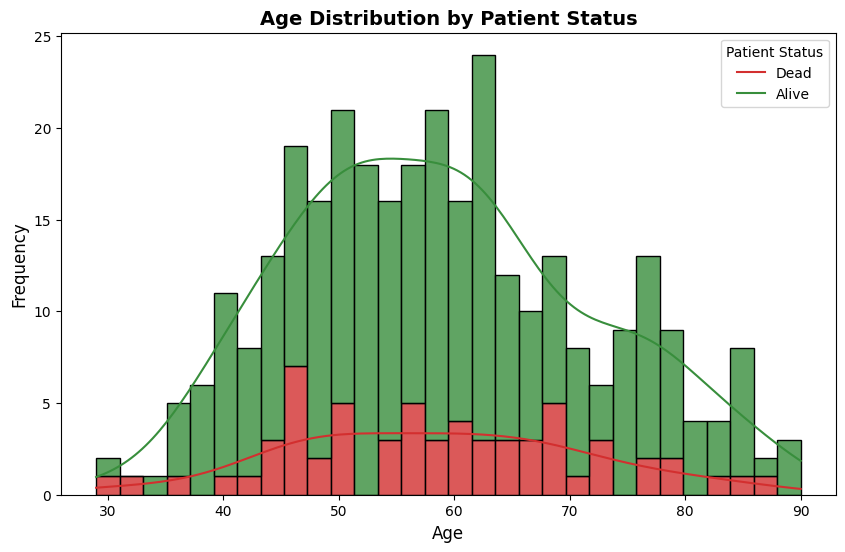

In [12]:
#Age Distribution by Patient Status
plt.figure(figsize=(10,6))

sns.histplot(
    data=df,
    x='Age', 
    hue='Patient_Status',
    kde=True, 
    palette={'Alive': '#388E3C', 'Dead': '#D32F2F'},
    bins=30, 
    alpha=0.8,
    multiple="stack"
    
)
plt.title('Age Distribution by Patient Status', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Patient Status', labels=['Dead', 'Alive'])
plt.show()


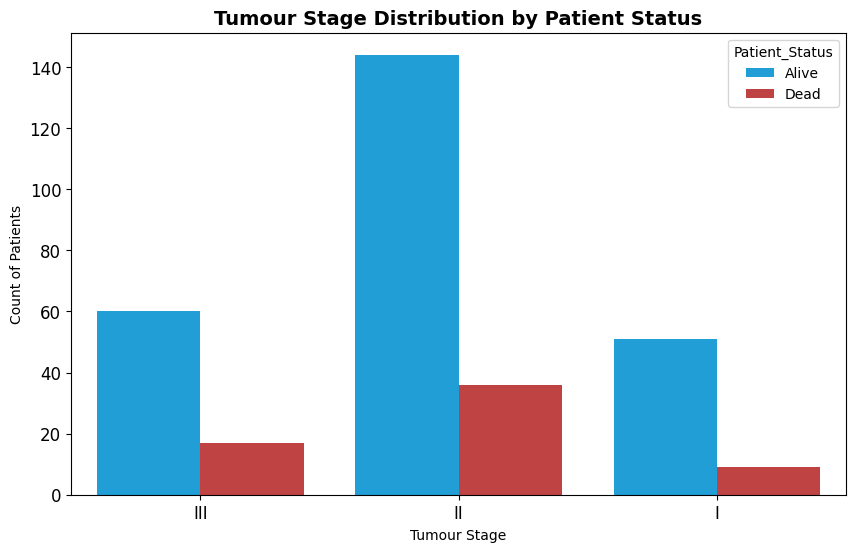

In [13]:
#Tumour Stage Distribution by Patient Status
plt.figure(figsize=(10, 6))

sns.countplot(x='Tumour_Stage', hue='Patient_Status', data=df, palette={'Alive': '#03a9f4', 'Dead': '#D32F2F'})

plt.title('Tumour Stage Distribution by Patient Status', fontsize=14, fontweight='bold')
plt.xlabel('Tumour Stage')
plt.ylabel('Count of Patients')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.show()

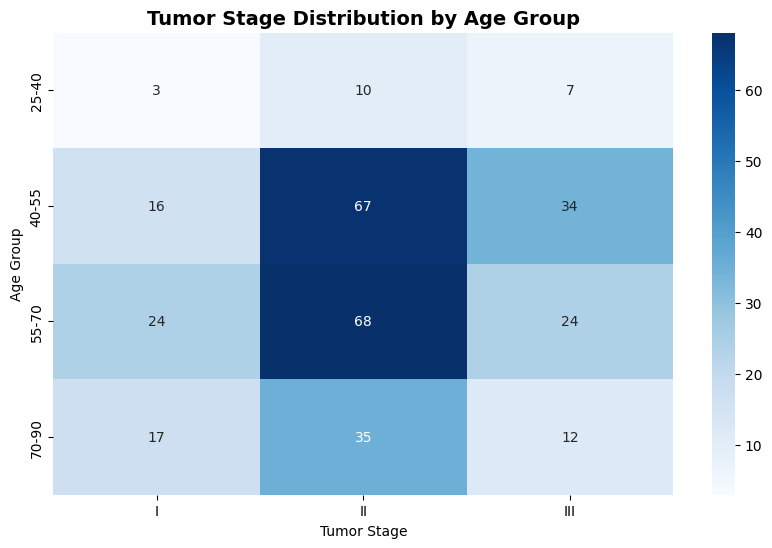

In [14]:
#Tumor Stage Distribution by Age Group
age_bins = [25, 40, 55, 70, 90]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=['25-40', '40-55', '55-70', '70-90'])

heatmap_data = pd.crosstab(df['Age_Group'], df['Tumour_Stage'])

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d')
plt.title('Tumor Stage Distribution by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Tumor Stage')
plt.ylabel('Age Group')
plt.show()


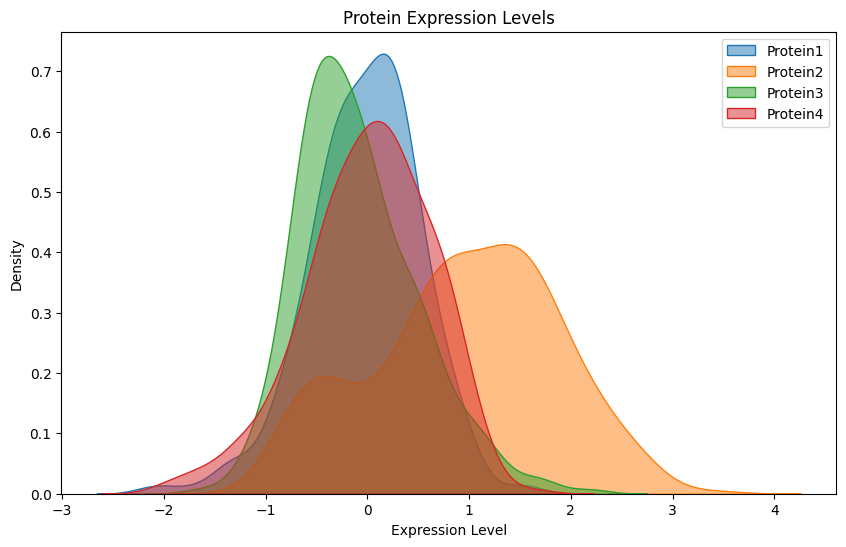

In [15]:
#Protein Expression Levels
plt.figure(figsize=(10,6))

proteins = ['Protein1', 'Protein2', 'Protein3', 'Protein4']
for protein in proteins:
    sns.kdeplot(data=df, x=protein, fill=True, alpha=0.5, label=protein)

plt.title('Protein Expression Levels')
plt.xlabel('Expression Level')
plt.ylabel('Density')
plt.legend()
plt.show()


<span style="font-size: 30px; font-weight: bold;">Data Preprocessing</span>

In [16]:
#Dropping Unnecessary Columns
df.drop(columns=["Patient_ID", "Gender", "ER status", "PR status", "Date_of_Surgery", "Date_of_Last_Visit", "Age_Group"], inplace=True)

In [17]:
le=LabelEncoder()
label=["HER2 status", "Surgery_type", "Patient_Status"]
df[label]=df[label].apply(le.fit_transform)

oe=OrdinalEncoder(categories=[['I', 'II', 'III']])
df["Tumour_Stage"]=oe.fit_transform(df[["Tumour_Stage"]])

df=pd.get_dummies(df, columns=['Histology'], dtype=int)

In [18]:
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,HER2 status,Surgery_type,Patient_Status,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma
0,36.0,0.080353,0.42638,0.54715,0.273680,2.0,0,1,0,1,0,0
1,43.0,-0.420320,0.57807,0.61447,-0.031505,1.0,0,0,1,0,0,1
2,69.0,0.213980,1.31140,-0.32747,-0.234260,2.0,0,2,0,1,0,0
3,56.0,0.345090,-0.21147,-0.19304,0.124270,1.0,0,1,0,1,0,0
4,56.0,0.221550,1.90680,0.52045,-0.311990,1.0,0,2,1,1,0,0


<span style="font-size: 30px; font-weight: bold;">Splitting the Data</span>

In [19]:
X=df.drop("Patient_Status", axis=1)
y=df["Patient_Status"]

<span style="font-size: 30px; font-weight: bold;">Applying NearMiss for Under-Sampling</span>

In [20]:
# Apply NearMiss for under-sampling to balance the class distribution
nearmiss = NearMiss(sampling_strategy='auto', version=2)
X_resampled, y_resampled = nearmiss.fit_resample(X, y)

print(f"Original class distribution: {Counter(y)}")
print(f"Resampled class distribution: {Counter(y_resampled)}")

Original class distribution: Counter({0: 255, 1: 62})
Resampled class distribution: Counter({0: 62, 1: 62})


<span style="font-size: 30px; font-weight: bold;">Train-Test Split</span>

In [21]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

<span style="font-size: 30px; font-weight: bold;">Random Forest Hyperparameter Tuning</span>

In [22]:
rf_base = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [500, 700],
    'max_depth': [10, 15, 20],
    'min_samples_split': [4, 6, 8],
    'min_samples_leaf': [2, 3, 4],
    'max_features': ['sqrt', 'log2', 0.5],
    'class_weight': ['balanced', None],
}

# Perform grid search with 5-fold cross-validation using all available CPU cores
grid_search = GridSearchCV(
    rf_base,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

# Print optimal hyperparameters
print("\n=== Random Forest Hyperparameters ===")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, grid_search.predict(X_train)))

print("\n\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, grid_search.predict(X_test)))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits

=== Random Forest Hyperparameters ===
class_weight: balanced
max_depth: 10
max_features: 0.5
min_samples_leaf: 3
min_samples_split: 4
n_estimators: 500

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.94      0.97        52

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99



=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.80      0.89        10

    accuracy                           0.92        25
   macro avg       0.94      0.90      0.91        25
weighted avg       0.93      0.92      0.92        25

